In [1]:
import pandas as pd
import numpy as np
import numpy.ma.mrecords as mrecords
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_recall_fscore_support, roc_curve, auc
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


In [2]:

file_path= r'C:\Users\xiaoy\Desktop\Intern\Healthcare\Healthcare_dataset.csv'

df= pd.read_csv(file_path)

In [3]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [4]:
df.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com

In [5]:
df.columns= df.columns.str.lower()

In [6]:
df.columns

Index(['ptid', 'persistency_flag', 'gender', 'race', 'ethnicity', 'region',
       'age_bucket', 'ntm_speciality', 'ntm_specialist_flag',
       'ntm_speciality_bucket', 'gluco_record_prior_ntm',
       'gluco_record_during_rx', 'dexa_freq_during_rx', 'dexa_during_rx',
       'frag_frac_prior_ntm', 'frag_frac_during_rx', 'risk_segment_prior_ntm',
       'tscore_bucket_prior_ntm', 'risk_segment_during_rx',
       'tscore_bucket_during_rx', 'change_t_score', 'change_risk_segment',
       'adherent_flag', 'idn_indicator', 'injectable_experience_during_rx',
       'comorb_encounter_for_screening_for_malignant_neoplasms',
       'comorb_encounter_for_immunization',
       'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx',
       'comorb_vitamin_d_deficiency',
       'comorb_other_joint_disorder_not_elsewhere_classified',
       'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx',
       'comorb_long_term_current_drug_therapy', 'comorb_dorsalgia',
       'com

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   ptid                                                                3424 non-null   object
 1   persistency_flag                                                    3424 non-null   object
 2   gender                                                              3424 non-null   object
 3   race                                                                3424 non-null   object
 4   ethnicity                                                           3424 non-null   object
 5   region                                                              3424 non-null   object
 6   age_bucket                                                          3424 non-null   object
 7   ntm_speciality          

In [8]:
missing_values = df.isnull().sum()
print(missing_values)

ptid                              0
persistency_flag                  0
gender                            0
race                              0
ethnicity                         0
                                 ..
risk_hysterectomy_oophorectomy    0
risk_estrogen_deficiency          0
risk_immobilization               0
risk_recurring_falls              0
count_of_risks                    0
Length: 69, dtype: int64


In [9]:
# Filter columns with more than 1 missing value
missing_values_filtered = missing_values[missing_values >= 1]
missing_values_filtered

Series([], dtype: int64)

In [10]:
# Check for duplicates (flagging all duplicates)
duplicates = df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
3419    False
3420    False
3421    False
3422    False
3423    False
Length: 3424, dtype: bool


In [11]:
df.dtypes

ptid                              object
persistency_flag                  object
gender                            object
race                              object
ethnicity                         object
                                   ...  
risk_hysterectomy_oophorectomy    object
risk_estrogen_deficiency          object
risk_immobilization               object
risk_recurring_falls              object
count_of_risks                     int64
Length: 69, dtype: object

In [12]:
var_list = ['ptid', 'persistency_flag', 'gender', 'race', 'ethnicity', 'region',
       'age_bucket', 'ntm_speciality', 'ntm_specialist_flag',
       'ntm_speciality_bucket', 'gluco_record_prior_ntm',
       'gluco_record_during_rx', 'dexa_freq_during_rx', 'dexa_during_rx',
       'frag_frac_prior_ntm', 'frag_frac_during_rx', 'risk_segment_prior_ntm',
       'tscore_bucket_prior_ntm', 'risk_segment_during_rx',
       'tscore_bucket_during_rx', 'change_t_score', 'change_risk_segment',
       'adherent_flag', 'idn_indicator', 'injectable_experience_during_rx',
       'comorb_encounter_for_screening_for_malignant_neoplasms',
       'comorb_encounter_for_immunization',
       'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx',
       'comorb_vitamin_d_deficiency',
       'comorb_other_joint_disorder_not_elsewhere_classified',
       'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx',
       'comorb_long_term_current_drug_therapy', 'comorb_dorsalgia',
       'comorb_personal_history_of_other_diseases_and_conditions',
       'comorb_other_disorders_of_bone_density_and_structure',
       'comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'comorb_osteoporosis_without_current_pathological_fracture',
       'comorb_personal_history_of_malignant_neoplasm',
       'comorb_gastro_esophageal_reflux_disease',
       'concom_cholesterol_and_triglyceride_regulating_preparations',
       'concom_narcotics', 'concom_systemic_corticosteroids_plain',
       'concom_anti_depressants_and_mood_stabilisers',
       'concom_fluoroquinolones', 'concom_cephalosporins',
       'concom_macrolides_and_similar_types',
       'concom_broad_spectrum_penicillins', 'concom_anaesthetics_general',
       'concom_viral_vaccines', 'risk_type_1_insulin_dependent_diabetes',
       'risk_osteogenesis_imperfecta', 'risk_rheumatoid_arthritis',
       'risk_untreated_chronic_hyperthyroidism',
       'risk_untreated_chronic_hypogonadism', 'risk_untreated_early_menopause',
       'risk_patient_parent_fractured_their_hip', 'risk_smoking_tobacco',
       'risk_chronic_malnutrition_or_malabsorption',
       'risk_chronic_liver_disease', 'risk_family_history_of_osteoporosis',
       'risk_low_calcium_intake', 'risk_vitamin_d_insufficiency',
       'risk_poor_health_frailty', 'risk_excessive_thinness',
       'risk_hysterectomy_oophorectomy', 'risk_estrogen_deficiency',
       'risk_immobilization', 'risk_recurring_falls', 'count_of_risks']
for var in var_list:
    print(f"====================Frequency Table for {var} =========================")
    tbl = df[var].value_counts()
    print(tbl)

====================Frequency Table for ptid =========================
P1       1
P2275    1
P2277    1
P2278    1
P2279    1
        ..
P1145    1
P1146    1
P1147    1
P1148    1
P3424    1
Name: ptid, Length: 3424, dtype: int64
====================Frequency Table for persistency_flag =========================
Non-Persistent    2135
Persistent        1289
Name: persistency_flag, dtype: int64
====================Frequency Table for gender =========================
Female    3230
Male       194
Name: gender, dtype: int64
====================Frequency Table for race =========================
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: race, dtype: int64
====================Frequency Table for ethnicity =========================
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: ethnicity, dtype: int64
====================Frequency Table for region =========================
Midwest          1383
South        

In [13]:
p1= df['dexa_freq_during_rx'].quantile(0.01)
p1

0.0

In [14]:
p99 = df['dexa_freq_during_rx'].quantile(0.99)
p99

34.76999999999998

In [15]:
p1_count_of_risks = df['count_of_risks'].quantile(0.01)
p1_count_of_risks

0.0

In [16]:
p99_count_of_risks = df['count_of_risks'].quantile(0.99)
p99_count_of_risks

4.0

In [17]:
# drop dexa_freq_during_rx < 1% and dexa_freq_during_rx > 99%
df1 = df[(df['dexa_freq_during_rx'] >=0) & (df['dexa_freq_during_rx']<=34.77 )]

df2 = df1[(df1['count_of_risks'] >=0) & (df1['count_of_risks']<= 4.0 )]

In [18]:
var_list2= ['gender', 'race', 'ethnicity', 'region',
       'age_bucket', 'ntm_speciality', 'ntm_specialist_flag',
       'ntm_speciality_bucket', 'gluco_record_prior_ntm',
       'gluco_record_during_rx', 'dexa_freq_during_rx', 'dexa_during_rx',
       'frag_frac_prior_ntm', 'frag_frac_during_rx', 'risk_segment_prior_ntm',
       'tscore_bucket_prior_ntm', 'risk_segment_during_rx',
       'tscore_bucket_during_rx', 'change_t_score', 'change_risk_segment',
       'adherent_flag', 'idn_indicator', 'injectable_experience_during_rx',
       'comorb_encounter_for_screening_for_malignant_neoplasms',
       'comorb_encounter_for_immunization',
       'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx',
       'comorb_vitamin_d_deficiency',
       'comorb_other_joint_disorder_not_elsewhere_classified',
       'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx',
       'comorb_long_term_current_drug_therapy', 'comorb_dorsalgia',
       'comorb_personal_history_of_other_diseases_and_conditions',
       'comorb_other_disorders_of_bone_density_and_structure',
       'comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'comorb_osteoporosis_without_current_pathological_fracture',
       'comorb_personal_history_of_malignant_neoplasm',
       'comorb_gastro_esophageal_reflux_disease',
       'concom_cholesterol_and_triglyceride_regulating_preparations',
       'concom_narcotics', 'concom_systemic_corticosteroids_plain',
       'concom_anti_depressants_and_mood_stabilisers',
       'concom_fluoroquinolones', 'concom_cephalosporins',
       'concom_macrolides_and_similar_types',
       'concom_broad_spectrum_penicillins', 'concom_anaesthetics_general',
       'concom_viral_vaccines', 'risk_type_1_insulin_dependent_diabetes',
       'risk_osteogenesis_imperfecta', 'risk_rheumatoid_arthritis',
       'risk_untreated_chronic_hyperthyroidism',
       'risk_untreated_chronic_hypogonadism', 'risk_untreated_early_menopause',
       'risk_patient_parent_fractured_their_hip', 'risk_smoking_tobacco',
       'risk_chronic_malnutrition_or_malabsorption',
       'risk_chronic_liver_disease', 'risk_family_history_of_osteoporosis',
       'risk_low_calcium_intake', 'risk_vitamin_d_insufficiency',
       'risk_poor_health_frailty', 'risk_excessive_thinness',
       'risk_hysterectomy_oophorectomy', 'risk_estrogen_deficiency',
       'risk_immobilization', 'risk_recurring_falls', 'count_of_risks']

In [19]:

df_concat= pd.DataFrame()
for var in var_list2:
    df_grp = df2.groupby([ var,'persistency_flag'])\
    .agg({'persistency_flag':"count"}).rename(columns={'persistency_flag': 'count'})\
    .reset_index()
    df_grp= df_grp.rename(columns={var:'category'})
    df_grp['segment']= var
    df_concat = pd.concat([df_concat,df_grp])
df_concat = df_concat.reset_index(drop= True)
print(df_concat)

             category persistency_flag  count         segment
0              Female   Non-Persistent   2005          gender
1              Female       Persistent   1171          gender
2                Male   Non-Persistent    115          gender
3                Male       Persistent     75          gender
4    African American   Non-Persistent     65            race
..                ...              ...    ...             ...
404                 2       Persistent    308  count_of_risks
405                 3   Non-Persistent    179  count_of_risks
406                 3       Persistent    136  count_of_risks
407                 4   Non-Persistent     50  count_of_risks
408                 4       Persistent     40  count_of_risks

[409 rows x 4 columns]


In [20]:
df_concat.to_csv('C:/Users/xiaoy/Desktop/Intern/Healthcare/cros_table.csv')

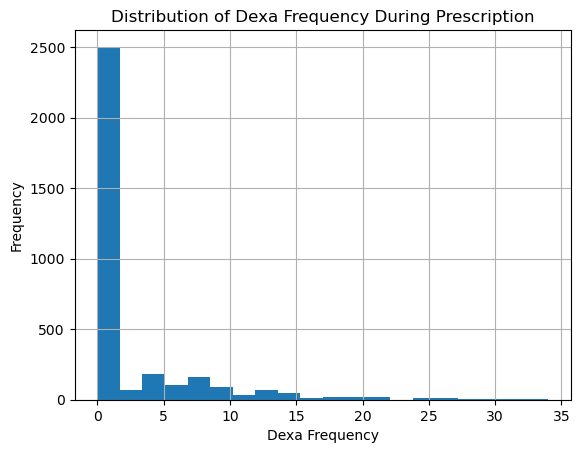

In [21]:
df2['dexa_freq_during_rx'].hist(bins=20)
# Adding a title
plt.title('Distribution of Dexa Frequency During Prescription')

# Adding labels (optional)
plt.xlabel('Dexa Frequency')
plt.ylabel('Frequency')

# Display the plot
plt.show()

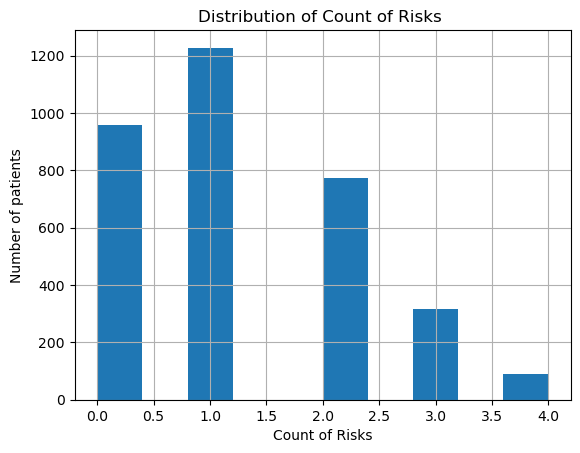

In [22]:
df2['count_of_risks'].hist(bins=10)
# Adding a title
plt.title('Distribution of Count of Risks ')

# Adding labels (optional)
plt.xlabel('Count of Risks')
plt.ylabel('Number of patients')

# Display the plot
plt.show()

### Feature Engineering

In [23]:
# Convert "Y" and "N" to 1 and 0
df2 = df2.replace({'Y': 1, 'N': 0})

In [24]:
# create new var of total comorbidity
como_list = ['comorb_encounter_for_screening_for_malignant_neoplasms',
       'comorb_encounter_for_immunization',
       'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx',
       'comorb_vitamin_d_deficiency',
       'comorb_other_joint_disorder_not_elsewhere_classified',
       'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx',
       'comorb_long_term_current_drug_therapy', 'comorb_dorsalgia',
       'comorb_personal_history_of_other_diseases_and_conditions',
       'comorb_other_disorders_of_bone_density_and_structure',
       'comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'comorb_osteoporosis_without_current_pathological_fracture',
       'comorb_personal_history_of_malignant_neoplasm',
       'comorb_gastro_esophageal_reflux_disease']

#  Sum the como_list
df2['total_comorbidity'] = df2[como_list].sum(axis=1)

In [25]:
# create new var of total concomitancy
concom_list = ['concom_cholesterol_and_triglyceride_regulating_preparations',
       'concom_narcotics', 'concom_systemic_corticosteroids_plain',
       'concom_anti_depressants_and_mood_stabilisers',
       'concom_fluoroquinolones', 'concom_cephalosporins',
       'concom_macrolides_and_similar_types',
       'concom_broad_spectrum_penicillins', 'concom_anaesthetics_general',
       'concom_viral_vaccines']
#  Sum the concom_list
df2['total_concomitancy'] = df2[concom_list].sum(axis=1)

In [26]:
df2[['total_comorbidity','total_concomitancy']].head()

,total_comorbidity,total_concomitancy
0,5,0
1,1,0
2,2,1
3,6,3
4,5,3


## drop columns

In [27]:
df3= df2.copy()
columns_to_drop= ['ptid','gender','frag_frac_prior_ntm','gluco_record_prior_ntm',
                  'risk_patient_parent_fractured_their_hip','risk_segment_prior_ntm',
                  'risk_untreated_chronic_hyperthyroidism','risk_estrogen_deficiency',
                  'risk_family_history_of_osteoporosis'
                 ]

In [28]:
df3 = df3.drop(columns_to_drop, axis=1)

In [29]:
df3.head()

,persistency_flag,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_during_rx,dexa_freq_during_rx,...,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_immobilization,risk_recurring_falls,count_of_risks,total_comorbidity,total_concomitancy
0,Persistent,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,0,...,0,0,0,0,0,0,0,0,5,0
1,Non-Persistent,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Non-Persistent,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,0,...,1,0,0,0,0,0,0,2,2,1
3,Non-Persistent,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,1,0,...,0,0,0,0,0,0,0,1,6,3
4,Non-Persistent,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,1,0,...,0,0,0,0,0,0,0,1,5,3


## variable transformation

### log and normalize

In [30]:

df3.loc[:,'dexa_freq_during_rx_p1']= df3['dexa_freq_during_rx']+1

In [31]:
df3.loc[:,'count_of_risks_p1']= df3['count_of_risks']+1

In [32]:
# log transformation for dexa_freq_during_rx
# log transformation for count_of_risks
df3.loc[:,'dexa_freq_during_rx_p1_log'] = np.log(df3['dexa_freq_during_rx_p1'])
df3.loc[:,'count_of_risks_p1_log'] = np.log(df3['count_of_risks_p1'])


In [33]:


# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the data
df3[['dexa_freq_during_rx_p1_log_scaled', 'count_of_risks_p1_log_scaled']] = scaler.fit_transform(df3[['dexa_freq_during_rx_p1_log', 'count_of_risks_p1_log']])

# Check the transformed data
df3[['dexa_freq_during_rx_p1_log', 'dexa_freq_during_rx_p1_log_scaled', 'count_of_risks_p1_log', 'count_of_risks_p1_log_scaled']].head()

,dexa_freq_during_rx_p1_log,dexa_freq_during_rx_p1_log_scaled,count_of_risks_p1_log,count_of_risks_p1_log_scaled
0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.000000,0.000000
2,0.0,0.0,1.098612,0.682606
3,0.0,0.0,0.693147,0.430677
4,0.0,0.0,0.693147,0.430677


### One hot encoding to categorical vars

In [34]:
categorical_vars = df3.select_dtypes(include=['object'])

In [35]:
categorical_vars

,persistency_flag,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag
0,Persistent,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent
1,Non-Persistent,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent
2,Non-Persistent,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent
3,Non-Persistent,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent
4,Non-Persistent,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,Persistent,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent
3420,Persistent,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,<=-2.5,Unknown,Unknown,Unknown,Unknown,Non-Adherent
3421,Persistent,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,>-2.5,HR_VHR,<=-2.5,No change,Worsened,Adherent
3422,Non-Persistent,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent


In [36]:
# Using sklearn.preprocessing.OneHotEncoder
encoder = OneHotEncoder(drop= 'first',sparse_output = False)
encoded_data = encoder.fit_transform(categorical_vars)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_vars.columns), index=categorical_vars.index)
df_encoded_sk = pd.concat([df3.drop(categorical_vars.columns, axis=1), encoded_df], axis=1)

In [37]:
df_encoded_sk.head()

,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_during_rx,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,...,risk_segment_during_rx_VLR_LR,tscore_bucket_during_rx_>-2.5,tscore_bucket_during_rx_Unknown,change_t_score_No change,change_t_score_Unknown,change_t_score_Worsened,change_risk_segment_No change,change_risk_segment_Unknown,change_risk_segment_Worsened,adherent_flag_Non-Adherent
0,0,0,0,0,0,1,0,1,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0,0,0,1,0,0,1,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,0,0,1,1,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,0,0,0,0,1,0,1,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0,0,0,0,1,1,1,1,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [38]:
df_encoded_sk.rename(columns={'persistency_flag_Persistent':'persistency_flag'}, inplace=True)

In [39]:
df_final = df_encoded_sk

In [40]:
print(df_final.columns.tolist())

['gluco_record_during_rx', 'dexa_freq_during_rx', 'dexa_during_rx', 'frag_frac_during_rx', 'idn_indicator', 'injectable_experience_during_rx', 'comorb_encounter_for_screening_for_malignant_neoplasms', 'comorb_encounter_for_immunization', 'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx', 'comorb_vitamin_d_deficiency', 'comorb_other_joint_disorder_not_elsewhere_classified', 'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx', 'comorb_long_term_current_drug_therapy', 'comorb_dorsalgia', 'comorb_personal_history_of_other_diseases_and_conditions', 'comorb_other_disorders_of_bone_density_and_structure', 'comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias', 'comorb_osteoporosis_without_current_pathological_fracture', 'comorb_personal_history_of_malignant_neoplasm', 'comorb_gastro_esophageal_reflux_disease', 'concom_cholesterol_and_triglyceride_regulating_preparations', 'concom_narcotics', 'concom_systemic_corticosteroids_plain', 'concom_anti_depr

In [41]:
from imblearn.pipeline import Pipeline

In [42]:
[ i for i in df_final.columns if 'persistency_flag' in i]

['persistency_flag']

In [43]:

# split the data
X = df_final.drop('persistency_flag', axis=1)  
y = df_final['persistency_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Round 1 feature selection

In [44]:

#  Create the RandomForest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    
# Train the model
rf_model.fit(X_train, y_train)
    
#  Make predictions
y_pred = rf_model.predict(X_test)
    
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
    

In [45]:
accuracy


0.7670623145400594

In [46]:
conf_matrix

array([[372,  48],
       [109, 145]], dtype=int64)

In [47]:
distribution = y_test.value_counts()
print("Distribution of y_test:")
print(distribution)

Distribution of y_test:
0.0    420
1.0    254
Name: persistency_flag, dtype: int64


In [48]:
# Retrieve feature importances
feature_importances = rf_model.feature_importances_


In [49]:
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})


In [50]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [51]:
print(feature_importance_df)

                              Feature  Importance
46                  total_comorbidity    0.072217
50         dexa_freq_during_rx_p1_log    0.060353
48             dexa_freq_during_rx_p1    0.058173
1                 dexa_freq_during_rx    0.055373
52  dexa_freq_during_rx_p1_log_scaled    0.055023
..                                ...         ...
76           ntm_speciality_NEUROLOGY    0.000000
67  ntm_speciality_EMERGENCY MEDICINE    0.000000
91            ntm_speciality_PODIATRY    0.000000
86       ntm_speciality_PAIN MEDICINE    0.000000
82       ntm_speciality_OPHTHALMOLOGY    0.000000

[116 rows x 2 columns]


In [52]:
# Select the top 50 features
top_50_features = feature_importance_df.head(50)['Feature'].values.tolist()
top_50_features

['total_comorbidity',
 'dexa_freq_during_rx_p1_log',
 'dexa_freq_during_rx_p1',
 'dexa_freq_during_rx',
 'dexa_freq_during_rx_p1_log_scaled',
 'total_concomitancy',
 'dexa_during_rx',
 'comorb_long_term_current_drug_therapy',
 'comorb_encounter_for_immunization',
 'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx',
 'comorb_encounter_for_screening_for_malignant_neoplasms',
 'count_of_risks_p1_log',
 'comorb_other_joint_disorder_not_elsewhere_classified',
 'count_of_risks_p1_log_scaled',
 'count_of_risks',
 'concom_systemic_corticosteroids_plain',
 'count_of_risks_p1',
 'region_South',
 'concom_viral_vaccines',
 'age_bucket_>75',
 'comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'concom_cephalosporins',
 'comorb_gastro_esophageal_reflux_disease',
 'comorb_dorsalgia',
 'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx',
 'tscore_bucket_prior_ntm_>-2.5',
 'age_bucket_65-75',
 'concom_cholesterol_and_triglyceride_regulating_preparations',

### Round 2 double check performance of 50 features vs 116 features

In [53]:
#  Create the RandomForest classifier
rf_model = RandomForestClassifier(n_estimators=100, min_samples_leaf = 5, random_state=42)
    
# Train the model
rf_model.fit(X_train[top_50_features], y_train)
    
#  Make predictions
y_pred = rf_model.predict(X_test[top_50_features])
    
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [54]:
accuracy

0.7670623145400594

In [55]:
conf_matrix

array([[371,  49],
       [108, 146]], dtype=int64)

### Round 3 grid search 

In [56]:
# Define the pipeline
pipeline = Pipeline([
    ('rf', RandomForestClassifier(random_state=42))
])

In [57]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [ 10, 20, 30],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15],
    'criterion': ['gini', 'entropy']
}

In [58]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train[top_50_features], y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Evaluate the model with the best parameters
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test[top_50_features])

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 200}
Accuracy: 0.771513353115727

Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       420
         1.0       0.76      0.57      0.65       254

    accuracy                           0.77       674
   macro avg       0.77      0.73      0.74       674
weighted avg       0.77      0.77      0.76       674


Confusion Matrix:
 [[374  46]
 [108 146]]


                                              Feature  Importance
0                                   total_comorbidity    0.112490
1                          dexa_freq_during_rx_p1_log    0.106525
2                              dexa_freq_during_rx_p1    0.100326
4                   dexa_freq_during_rx_p1_log_scaled    0.096065
3                                 dexa_freq_during_rx    0.085400
7               comorb_long_term_current_drug_therapy    0.050771
6                                      dexa_during_rx    0.048652
5                                  total_concomitancy    0.046728
8                   comorb_encounter_for_immunization    0.032401
10  comorb_encounter_for_screening_for_malignant_n...    0.025476
9   comorb_encntr_for_general_exam_w_o_complaint,_...    0.025115
18                              concom_viral_vaccines    0.013735
15              concom_systemic_corticosteroids_plain    0.011728
12  comorb_other_joint_disorder_not_elsewhere_clas...    0.011363
28  comorb

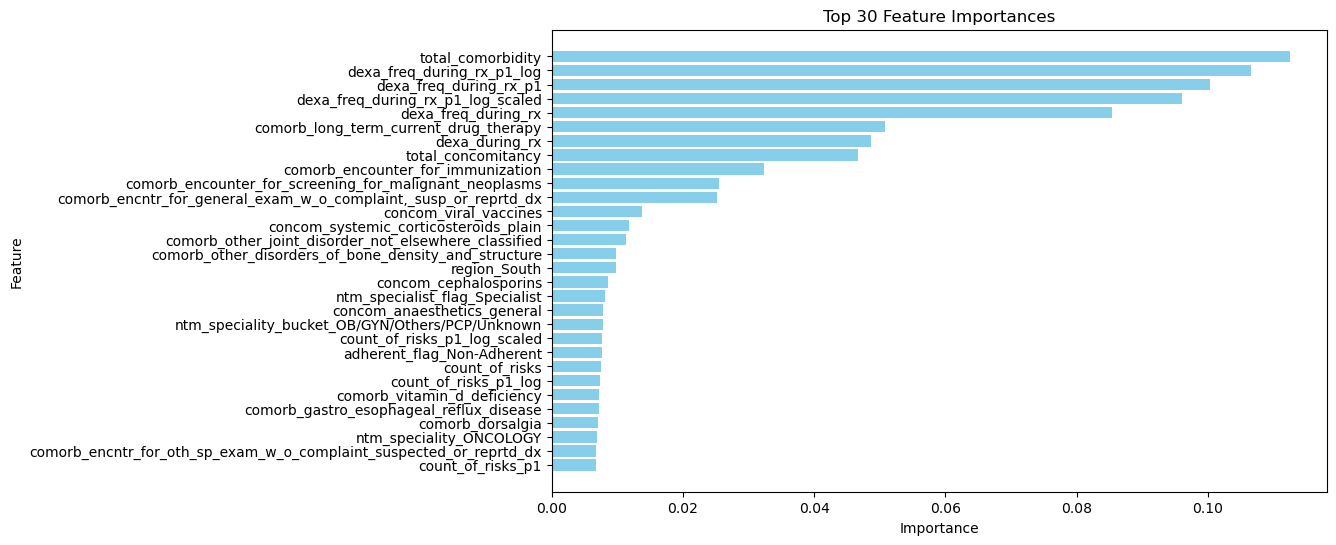

In [59]:
# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train[top_50_features].columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Get the top 30 features
top_30_features = feature_importance_df.head(30)

# Print the top 30 feature importances
print(top_30_features)

# Plot the top 30 feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_30_features['Feature'], top_30_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 30 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [60]:
# Filter features that start with 'comorb'
[i for i in top_50_features if 'comorb' in i]

['total_comorbidity',
 'comorb_long_term_current_drug_therapy',
 'comorb_encounter_for_immunization',
 'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx',
 'comorb_encounter_for_screening_for_malignant_neoplasms',
 'comorb_other_joint_disorder_not_elsewhere_classified',
 'comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'comorb_gastro_esophageal_reflux_disease',
 'comorb_dorsalgia',
 'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx',
 'comorb_other_disorders_of_bone_density_and_structure',
 'comorb_vitamin_d_deficiency',
 'comorb_personal_history_of_other_diseases_and_conditions',
 'comorb_osteoporosis_without_current_pathological_fracture',
 'comorb_personal_history_of_malignant_neoplasm']

In [61]:
[i for i in top_50_features if 'concom' in i]

['total_concomitancy',
 'concom_systemic_corticosteroids_plain',
 'concom_viral_vaccines',
 'concom_cephalosporins',
 'concom_cholesterol_and_triglyceride_regulating_preparations',
 'concom_macrolides_and_similar_types',
 'concom_fluoroquinolones',
 'concom_anti_depressants_and_mood_stabilisers',
 'concom_narcotics',
 'concom_broad_spectrum_penicillins',
 'concom_anaesthetics_general']

In [62]:
drop_list = ['comorb_long_term_current_drug_therapy',
 'comorb_encounter_for_immunization',
 'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx',
 'comorb_encounter_for_screening_for_malignant_neoplasms',
 'comorb_other_joint_disorder_not_elsewhere_classified',
 'comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'comorb_gastro_esophageal_reflux_disease',
 'comorb_dorsalgia',
 'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx',
 'comorb_other_disorders_of_bone_density_and_structure',
 'comorb_vitamin_d_deficiency',
 'comorb_personal_history_of_other_diseases_and_conditions',
 'comorb_osteoporosis_without_current_pathological_fracture',
 'comorb_personal_history_of_malignant_neoplasm','concom_systemic_corticosteroids_plain',
 'concom_viral_vaccines',
 'concom_cephalosporins',
 'concom_cholesterol_and_triglyceride_regulating_preparations',
 'concom_macrolides_and_similar_types',
 'concom_fluoroquinolones',
 'concom_anti_depressants_and_mood_stabilisers',
 'concom_narcotics',
 'concom_broad_spectrum_penicillins',
 'concom_anaesthetics_general']
# Using set difference to subtract top_50_features from drop_list
net_features = list(set(top_50_features) - set(drop_list))
net_features

['ntm_specialist_flag_Specialist',
 'risk_segment_during_rx_VLR_LR',
 'dexa_freq_during_rx_p1',
 'dexa_freq_during_rx_p1_log',
 'tscore_bucket_prior_ntm_>-2.5',
 'total_concomitancy',
 'dexa_during_rx',
 'idn_indicator',
 'region_South',
 'ntm_speciality_ONCOLOGY',
 'adherent_flag_Non-Adherent',
 'ntm_speciality_GENERAL PRACTITIONER',
 'age_bucket_>75',
 'dexa_freq_during_rx_p1_log_scaled',
 'risk_smoking_tobacco',
 'tscore_bucket_during_rx_>-2.5',
 'gluco_record_during_rx',
 'dexa_freq_during_rx',
 'count_of_risks_p1',
 'age_bucket_65-75',
 'risk_vitamin_d_insufficiency',
 'total_comorbidity',
 'count_of_risks_p1_log',
 'count_of_risks',
 'ntm_speciality_bucket_OB/GYN/Others/PCP/Unknown',
 'count_of_risks_p1_log_scaled']

In [63]:
len(net_features)

26

### Round 4 

In [64]:
# Define the pipeline
pipeline = Pipeline([
    ('rf', RandomForestClassifier(random_state=42))
])

In [65]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150,200,250, 300],
    'max_depth': [ 10,15, 20, 25],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15],
    'criterion': ['gini', 'entropy']
}

In [66]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train[net_features], y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Evaluate the model with the best parameters
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test[net_features])

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.7685459940652819

Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.90      0.83       420
         1.0       0.76      0.56      0.65       254

    accuracy                           0.77       674
   macro avg       0.77      0.73      0.74       674
weighted avg       0.77      0.77      0.76       674


Confusion Matrix:
 [[376  44]
 [112 142]]


                                            Feature  Importance
21                                total_comorbidity    0.192205
2                            dexa_freq_during_rx_p1    0.133475
17                              dexa_freq_during_rx    0.111422
13                dexa_freq_during_rx_p1_log_scaled    0.110158
3                        dexa_freq_during_rx_p1_log    0.104289
5                                total_concomitancy    0.087156
6                                    dexa_during_rx    0.061094
16                           gluco_record_during_rx    0.020966
8                                      region_South    0.015692
9                           ntm_speciality_ONCOLOGY    0.014528
0                    ntm_specialist_flag_Specialist    0.011430
24  ntm_speciality_bucket_OB/GYN/Others/PCP/Unknown    0.011344
18                                count_of_risks_p1    0.010186
25                     count_of_risks_p1_log_scaled    0.009944
22                            count_of_r

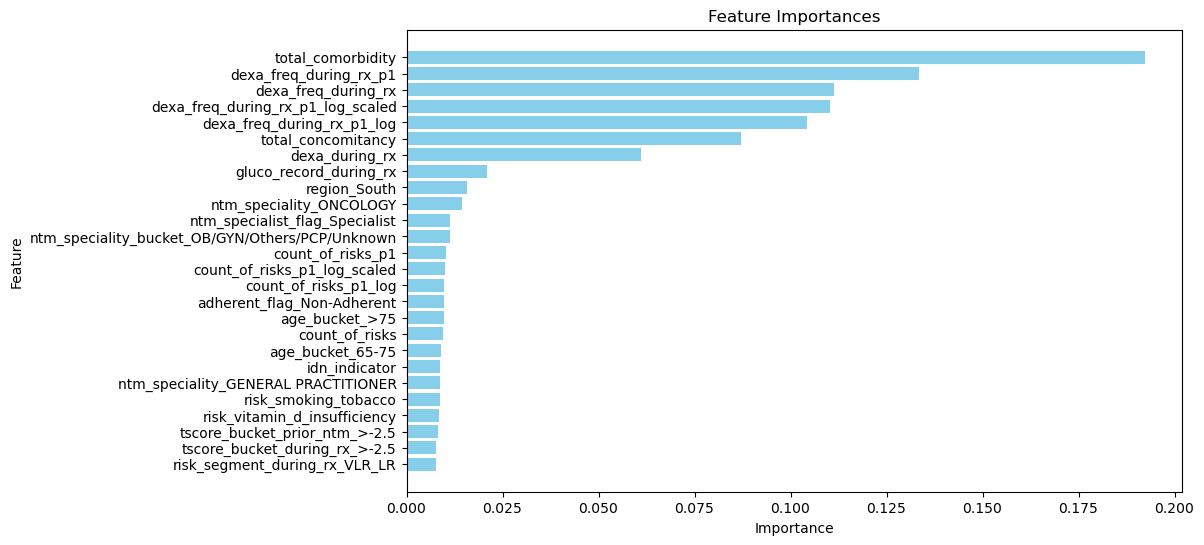

In [67]:
# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train[net_features].columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


# Print the feature importances
print(feature_importance_df)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [68]:
net_features2 = list(set(net_features) -set(['risk_vitamin_d_insufficiency','ntm_speciality_GENERAL PRACTITIONER','tscore_bucket_during_rx_>-2.5','adherent_flag_Non-Adherent','risk_segment_during_rx_VLR_LR','risk_smoking_tobacco']))

In [69]:
len(net_features2)

20

### Round 5

In [70]:
# Define the pipeline
pipeline = Pipeline([
    ('rf', RandomForestClassifier(random_state=42))
])

In [71]:
# Define the parameter grid
param_grid = {
    'n_estimators': [80,100, 150,200,250, 300],
    'max_depth': [ 10,15, 20, 25],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15],
    'criterion': ['gini', 'entropy']
}

In [72]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train[net_features2], y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Evaluate the model with the best parameters
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test[net_features2])

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 80}
Accuracy: 0.7611275964391692

Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.88      0.82       420
         1.0       0.74      0.57      0.64       254

    accuracy                           0.76       674
   macro avg       0.75      0.72      0.73       674
weighted avg       0.76      0.76      0.75       674


Confusion Matrix:
 [[369  51]
 [110 144]]


                                            Feature  Importance
15                                total_comorbidity    0.199775
2                        dexa_freq_during_rx_p1_log    0.132604
1                            dexa_freq_during_rx_p1    0.108928
10                dexa_freq_during_rx_p1_log_scaled    0.101877
12                              dexa_freq_during_rx    0.100705
4                                total_concomitancy    0.093291
5                                    dexa_during_rx    0.089752
11                           gluco_record_during_rx    0.022862
8                           ntm_speciality_ONCOLOGY    0.016929
7                                      region_South    0.016204
0                    ntm_specialist_flag_Specialist    0.012987
18  ntm_speciality_bucket_OB/GYN/Others/PCP/Unknown    0.012575
6                                     idn_indicator    0.012119
19                     count_of_risks_p1_log_scaled    0.012005
14                                 age_b

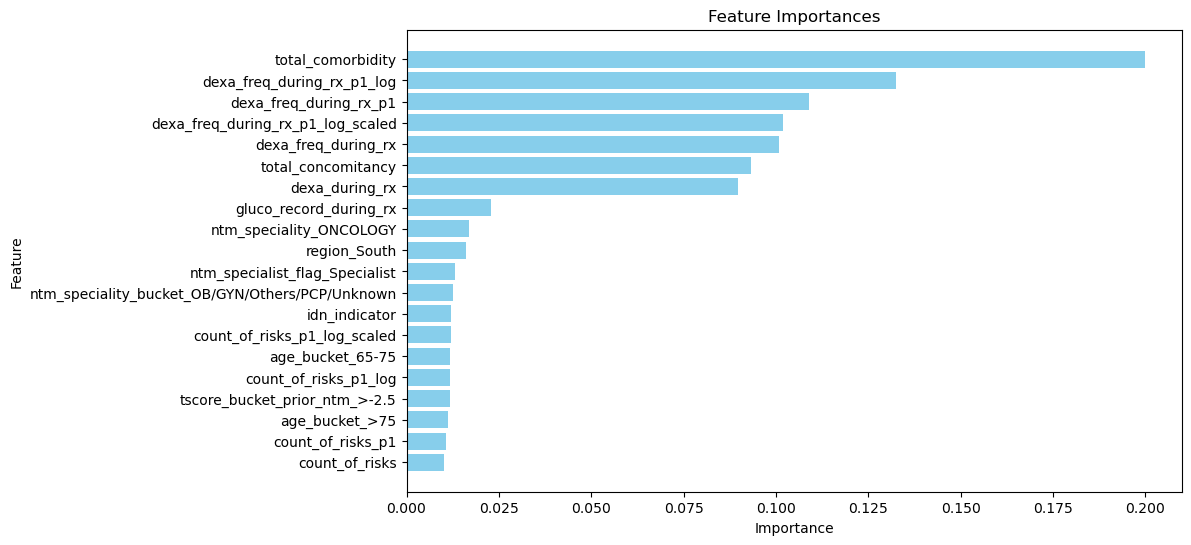

In [73]:
# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train[net_features2].columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


# Print the feature importances
print(feature_importance_df)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

### ROC-AUC of randomforest model

ROC-AUC Score: 0.8364923134608173


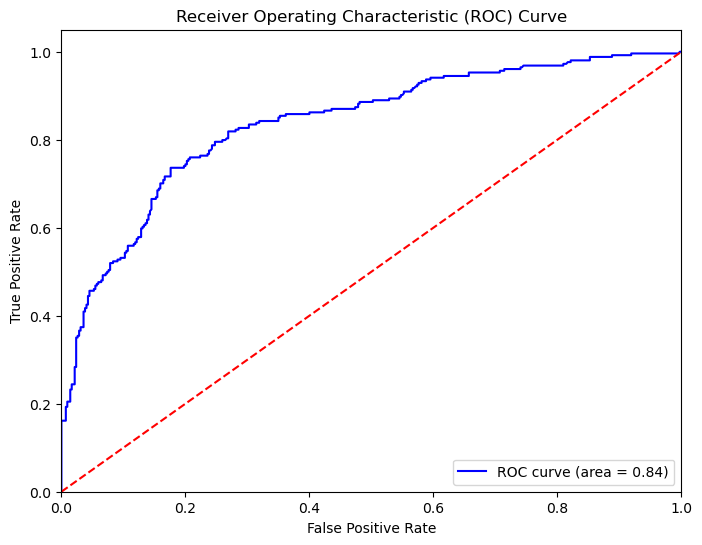

In [74]:
# Get the predicted probabilities for the positive class
y_prob = best_rf_model.predict_proba(X_test[net_features2])[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression

In [75]:
# check VIF of the variables

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


X = X_train.copy()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                           feature        VIF
0           gluco_record_during_rx   3.123994
1              dexa_freq_during_rx        inf
2                   dexa_during_rx  34.861012
3              frag_frac_during_rx   1.281631
4                    idn_indicator   1.326020
..                             ...        ...
111        change_t_score_Worsened   3.665397
112  change_risk_segment_No change  37.692098
113    change_risk_segment_Unknown  40.730414
114   change_risk_segment_Worsened   7.354452
115     adherent_flag_Non-Adherent   1.066560

[116 rows x 2 columns]


In [77]:
vif_data.to_csv('C:/Users/xiaoy/Desktop/Intern/Healthcare/vif_data.csv')

In [78]:
drop_list2=['dexa_freq_during_rx','comorb_encounter_for_immunization','concom_cholesterol_and_triglyceride_regulating_preparations','dexa_freq_during_rx_p1',\
            'ntm_speciality_ENDOCRINOLOGY','ntm_speciality_OBSTETRICS AND GYNECOLOGY','ntm_speciality_RHEUMATOLOGY','ntm_speciality_bucket_Rheum',\
           'tscore_bucket_during_rx_Unknown','change_t_score_Unknown']

In [79]:
# Using set difference to subtract top_50_features from drop_list
net_features3 = list(set(X_train.columns) - set(drop_list2))
net_features3

['risk_hysterectomy_oophorectomy',
 'region_Northeast',
 'risk_immobilization',
 'ntm_specialist_flag_Specialist',
 'ntm_speciality_PODIATRY',
 'comorb_gastro_esophageal_reflux_disease',
 'dexa_freq_during_rx_p1_log',
 'comorb_other_joint_disorder_not_elsewhere_classified',
 'concom_fluoroquinolones',
 'comorb_osteoporosis_without_current_pathological_fracture',
 'ntm_speciality_HOSPICE AND PALLIATIVE MEDICINE',
 'ntm_speciality_PLASTIC SURGERY',
 'dexa_during_rx',
 'risk_chronic_malnutrition_or_malabsorption',
 'idn_indicator',
 'concom_cephalosporins',
 'region_Other/Unknown',
 'risk_rheumatoid_arthritis',
 'age_bucket_<55',
 'concom_viral_vaccines',
 'ethnicity_Unknown',
 'frag_frac_during_rx',
 'ntm_speciality_ONCOLOGY',
 'ntm_speciality_HOSPITAL MEDICINE',
 'ntm_speciality_ORTHOPEDIC SURGERY',
 'risk_recurring_falls',
 'ntm_speciality_NUCLEAR MEDICINE',
 'adherent_flag_Non-Adherent',
 'ntm_speciality_PSYCHIATRY AND NEUROLOGY',
 'ntm_speciality_PAIN MEDICINE',
 'ntm_speciality_GENE

In [80]:
### Round 2
X = X_train[net_features3]

# Calculate VIF for each feature
vif_data2 = pd.DataFrame()
vif_data2["features"] = X.columns
vif_data2["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data2)

                                            features          VIF
0                     risk_hysterectomy_oophorectomy     1.140062
1                                   region_Northeast     1.304564
2                                risk_immobilization     1.180849
3                     ntm_specialist_flag_Specialist    45.471568
4                            ntm_speciality_PODIATRY          NaN
..                                               ...          ...
101  ntm_speciality_bucket_OB/GYN/Others/PCP/Unknown     9.954020
102                                   count_of_risks  1162.102971
103    comorb_personal_history_of_malignant_neoplasm     2.173148
104                          risk_low_calcium_intake     1.175377
105                   risk_untreated_early_menopause     1.070793

[106 rows x 2 columns]


In [81]:
vif_data2.to_csv('C:/Users/xiaoy/Desktop/Intern/Healthcare/vif_data2.csv')

In [82]:
drop_list3=['dexa_freq_during_rx','comorb_encounter_for_immunization','concom_cholesterol_and_triglyceride_regulating_preparations','dexa_freq_during_rx_p1',\
            'ntm_speciality_ENDOCRINOLOGY','ntm_speciality_OBSTETRICS AND GYNECOLOGY','ntm_speciality_RHEUMATOLOGY','ntm_speciality_bucket_Rheum',\
           'tscore_bucket_during_rx_Unknown','change_t_score_Unknown','count_of_risks','count_of_risks_p1','count_of_risks_p1_log','dexa_during_rx','dexa_freq_during_rx_p1_log']

In [83]:
# Using set difference to subtract top_50_features from drop_list
net_features4 = list(set(X_train.columns) - set(drop_list3))
net_features4

['risk_hysterectomy_oophorectomy',
 'region_Northeast',
 'risk_immobilization',
 'ntm_specialist_flag_Specialist',
 'ntm_speciality_PODIATRY',
 'comorb_gastro_esophageal_reflux_disease',
 'comorb_other_joint_disorder_not_elsewhere_classified',
 'concom_fluoroquinolones',
 'comorb_osteoporosis_without_current_pathological_fracture',
 'ntm_speciality_HOSPICE AND PALLIATIVE MEDICINE',
 'ntm_speciality_PLASTIC SURGERY',
 'risk_chronic_malnutrition_or_malabsorption',
 'idn_indicator',
 'concom_cephalosporins',
 'region_Other/Unknown',
 'risk_rheumatoid_arthritis',
 'age_bucket_<55',
 'concom_viral_vaccines',
 'ethnicity_Unknown',
 'frag_frac_during_rx',
 'ntm_speciality_ONCOLOGY',
 'ntm_speciality_HOSPITAL MEDICINE',
 'ntm_speciality_ORTHOPEDIC SURGERY',
 'risk_recurring_falls',
 'ntm_speciality_NUCLEAR MEDICINE',
 'adherent_flag_Non-Adherent',
 'ntm_speciality_PSYCHIATRY AND NEUROLOGY',
 'ntm_speciality_PAIN MEDICINE',
 'ntm_speciality_GENERAL PRACTITIONER',
 'ntm_speciality_ORTHOPEDICS',


In [84]:
X = X_train[net_features4]

# Calculate VIF for each feature
vif_data3 = pd.DataFrame()
vif_data3["features"] = X.columns
vif_data3["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data3)

                                            features        VIF
0                     risk_hysterectomy_oophorectomy   1.115876
1                                   region_Northeast   1.399171
2                                risk_immobilization   1.179745
3                     ntm_specialist_flag_Specialist  47.017519
4                            ntm_speciality_PODIATRY        NaN
..                                               ...        ...
96            risk_type_1_insulin_dependent_diabetes   1.213542
97   ntm_speciality_bucket_OB/GYN/Others/PCP/Unknown  23.158846
98     comorb_personal_history_of_malignant_neoplasm   2.669392
99                           risk_low_calcium_intake   1.164531
100                   risk_untreated_early_menopause   1.060884

[101 rows x 2 columns]


In [85]:
vif_data3.to_csv('C:/Users/xiaoy/Desktop/Intern/Healthcare/vif_data3.csv')

In [86]:
drop_list4 = ['dexa_freq_during_rx','comorb_encounter_for_immunization','concom_cholesterol_and_triglyceride_regulating_preparations','dexa_freq_during_rx_p1',\
            'ntm_speciality_ENDOCRINOLOGY','ntm_speciality_OBSTETRICS AND GYNECOLOGY','ntm_speciality_RHEUMATOLOGY','ntm_speciality_bucket_Rheum',\
           'tscore_bucket_during_rx_Unknown','change_t_score_Unknown','count_of_risks','count_of_risks_p1','count_of_risks_p1_log','dexa_during_rx','dexa_freq_during_rx_p1_log',\
           'change_risk_segment_Unknown','change_risk_segment_No change','ntm_speciality_Unknown','ntm_specialist_flag_Specialist','risk_segment_during_rx_Unknown',\
            'risk_vitamin_d_insufficiency','comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias','concom_systemic_corticosteroids_plain',\
           'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx','comorb_encounter_for_screening_for_malignant_neoplasms','comorb_vitamin_d_deficiency',\
           'concom_narcotics']

In [87]:
net_features5 = list(set(X_train.columns) - set(drop_list3))
net_features5

['risk_hysterectomy_oophorectomy',
 'region_Northeast',
 'risk_immobilization',
 'ntm_specialist_flag_Specialist',
 'ntm_speciality_PODIATRY',
 'comorb_gastro_esophageal_reflux_disease',
 'comorb_other_joint_disorder_not_elsewhere_classified',
 'concom_fluoroquinolones',
 'comorb_osteoporosis_without_current_pathological_fracture',
 'ntm_speciality_HOSPICE AND PALLIATIVE MEDICINE',
 'ntm_speciality_PLASTIC SURGERY',
 'risk_chronic_malnutrition_or_malabsorption',
 'idn_indicator',
 'concom_cephalosporins',
 'region_Other/Unknown',
 'risk_rheumatoid_arthritis',
 'age_bucket_<55',
 'concom_viral_vaccines',
 'ethnicity_Unknown',
 'frag_frac_during_rx',
 'ntm_speciality_ONCOLOGY',
 'ntm_speciality_HOSPITAL MEDICINE',
 'ntm_speciality_ORTHOPEDIC SURGERY',
 'risk_recurring_falls',
 'ntm_speciality_NUCLEAR MEDICINE',
 'adherent_flag_Non-Adherent',
 'ntm_speciality_PSYCHIATRY AND NEUROLOGY',
 'ntm_speciality_PAIN MEDICINE',
 'ntm_speciality_GENERAL PRACTITIONER',
 'ntm_speciality_ORTHOPEDICS',


In [88]:
X = X_train[net_features5]

# Calculate VIF for each feature
vif_data4 = pd.DataFrame()
vif_data4["features"] = X.columns
vif_data4["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data4)

                                            features        VIF
0                     risk_hysterectomy_oophorectomy   1.115876
1                                   region_Northeast   1.399171
2                                risk_immobilization   1.179745
3                     ntm_specialist_flag_Specialist  47.017519
4                            ntm_speciality_PODIATRY        NaN
..                                               ...        ...
96            risk_type_1_insulin_dependent_diabetes   1.213542
97   ntm_speciality_bucket_OB/GYN/Others/PCP/Unknown  23.158846
98     comorb_personal_history_of_malignant_neoplasm   2.669392
99                           risk_low_calcium_intake   1.164531
100                   risk_untreated_early_menopause   1.060884

[101 rows x 2 columns]


In [89]:
vif_data4.to_csv('C:/Users/xiaoy/Desktop/Intern/Healthcare/vif_data4.csv')

In [90]:
drop_list5= list(set(drop_list4 + ['change_risk_segment_Unknown',
                          'change_t_score_No change',
                          "comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias",
                        "comorb_dorsalgia",
                        "comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",
                        "comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx",
                        "comorb_encounter_for_screening_for_malignant_neoplasms",
                        "comorb_gastro_esophageal_reflux_disease",
                        "comorb_long_term_current_drug_therapy",
                        "comorb_osteoporosis_without_current_pathological_fracture",
                        "comorb_other_disorders_of_bone_density_and_structure",
                        "comorb_other_joint_disorder_not_elsewhere_classified",
                        "comorb_personal_history_of_malignant_neoplasm",
                        "comorb_personal_history_of_other_diseases_and_conditions",
                        "comorb_vitamin_d_deficiency",
                        "concom_anaesthetics_general",
                        "concom_anti_depressants_and_mood_stabilisers",
                        "concom_broad_spectrum_penicillins",
                        "concom_cephalosporins",
                        "concom_fluoroquinolones",
                        "concom_macrolides_and_similar_types",
                        "concom_narcotics",
                        "concom_systemic_corticosteroids_plain",
                        "concom_viral_vaccines",
                         "ethnicity_Not Hispanic",
                        "ntm_speciality_bucket_OB/GYN/Others/PCP/Unknown",
                        "race_Caucasian",
                        "ntm_speciality_GENERAL PRACTITIONER",
                        "risk_chronic_liver_disease",
                        "risk_chronic_malnutrition_or_malabsorption",
                        "risk_excessive_thinness",
                        "risk_hysterectomy_oophorectomy",
                        "risk_immobilization",
                        "risk_low_calcium_intake",
                        "risk_osteogenesis_imperfecta",
                        "risk_poor_health_frailty",
                        "risk_recurring_falls",
                        "risk_rheumatoid_arthritis",
                        "risk_segment_during_rx_Unknown",
                        "risk_segment_during_rx_VLR_LR",
                        "risk_smoking_tobacco",
                        "risk_type_1_insulin_dependent_diabetes",
                        "risk_untreated_chronic_hypogonadism",
                        "risk_untreated_early_menopause",
                        "risk_vitamin_d_insufficiency",
                        "ntm_speciality_EMERGENCY MEDICINE", 
                        "ntm_speciality_OPHTHALMOLOGY",
                        "ntm_speciality_NEPHROLOGY",
                         "ntm_speciality_PODIATRY"          

]))

In [91]:
net_features6 = list(set(X_train.columns) - set(drop_list5))
net_features6

['region_Northeast',
 'ntm_speciality_RADIOLOGY',
 'ntm_speciality_UROLOGY',
 'race_Other/Unknown',
 'ntm_speciality_PATHOLOGY',
 'tscore_bucket_prior_ntm_>-2.5',
 'ntm_speciality_GASTROENTEROLOGY',
 'total_concomitancy',
 'ntm_speciality_HOSPICE AND PALLIATIVE MEDICINE',
 'ntm_speciality_PLASTIC SURGERY',
 'idn_indicator',
 'region_Other/Unknown',
 'ntm_speciality_SURGERY AND SURGICAL SPECIALTIES',
 'change_risk_segment_Worsened',
 'age_bucket_<55',
 'ntm_speciality_OTOLARYNGOLOGY',
 'region_South',
 'ntm_speciality_PEDIATRICS',
 'ethnicity_Unknown',
 'race_Asian',
 'frag_frac_during_rx',
 'ntm_speciality_ONCOLOGY',
 'ntm_speciality_HOSPITAL MEDICINE',
 'ntm_speciality_ORTHOPEDIC SURGERY',
 'ntm_speciality_HEMATOLOGY & ONCOLOGY',
 'ntm_speciality_NUCLEAR MEDICINE',
 'adherent_flag_Non-Adherent',
 'ntm_speciality_ORTHOPEDICS',
 'ntm_speciality_PSYCHIATRY AND NEUROLOGY',
 'ntm_speciality_PAIN MEDICINE',
 'age_bucket_>75',
 'dexa_freq_during_rx_p1_log_scaled',
 'tscore_bucket_during_rx_>

In [92]:
X = X_train[net_features6]

# Calculate VIF for each feature
vif_data5 = pd.DataFrame()
vif_data5["features"] = X.columns
vif_data5["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data5)

                                             features       VIF
0                                    region_Northeast  1.215050
1                            ntm_speciality_RADIOLOGY  1.004865
2                              ntm_speciality_UROLOGY  1.032994
3                                  race_Other/Unknown  1.101548
4                            ntm_speciality_PATHOLOGY  1.020069
5                       tscore_bucket_prior_ntm_>-2.5  2.748949
6                     ntm_speciality_GASTROENTEROLOGY  1.011710
7                                  total_concomitancy  4.157859
8      ntm_speciality_HOSPICE AND PALLIATIVE MEDICINE  1.006375
9                      ntm_speciality_PLASTIC SURGERY  1.006782
10                                      idn_indicator  4.599909
11                               region_Other/Unknown  1.057864
12    ntm_speciality_SURGERY AND SURGICAL SPECIALTIES  1.009224
13                       change_risk_segment_Worsened  1.292576
14                                     a

In [93]:
vif_data5.to_csv('C:/Users/xiaoy/Desktop/Intern/Healthcare/vif_data5.csv')

In [94]:
# Initialize and fit the model
model = LogisticRegression()
model.fit( X_train[net_features6], y_train)

# Predict on test data
y_pred = model.predict(X_test[net_features6])

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7789317507418397
Confusion Matrix:
[[372  48]
 [101 153]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.89      0.83       420
         1.0       0.76      0.60      0.67       254

    accuracy                           0.78       674
   macro avg       0.77      0.74      0.75       674
weighted avg       0.78      0.78      0.77       674



In [95]:
# Get model coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Calculate standard errors
X_train_const = np.column_stack([np.ones(X_train[net_features6].shape[0]), X_train[net_features6]])
predictions = model.predict_proba(X_train_const[:, 1:])[:, 1]
V = np.diagflat(predictions * (1 - predictions))
cov_logit = np.linalg.inv(np.dot(np.dot(X_train_const.T, V), X_train_const))
standard_errors = np.sqrt(np.diag(cov_logit))

# Calculate z-scores and p-values
z_scores = coefficients / standard_errors[1:]
p_values = [stats.norm.sf(abs(x)) * 2 for x in z_scores]


In [96]:
# Combine feature names, coefficients, and p-values into a DataFrame
summary_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Standard Error': standard_errors[1:],
    'z-score': z_scores,
    'p-value': p_values
})

print('Intercept:', intercept)
print('Summary:')
print(summary_df)

Intercept: -4.020585634640369
Summary:
                                              Feature  Coefficient  \
0                                    region_Northeast     0.880911   
1                            ntm_speciality_RADIOLOGY     0.558748   
2                              ntm_speciality_UROLOGY    -0.230565   
3                                  race_Other/Unknown    -0.217111   
4                            ntm_speciality_PATHOLOGY     0.772542   
5                       tscore_bucket_prior_ntm_>-2.5    -0.104925   
6                     ntm_speciality_GASTROENTEROLOGY    -0.098702   
7                                  total_concomitancy     0.134830   
8      ntm_speciality_HOSPICE AND PALLIATIVE MEDICINE    -0.368738   
9                      ntm_speciality_PLASTIC SURGERY     0.488334   
10                                      idn_indicator     0.415874   
11                               region_Other/Unknown     0.170817   
12    ntm_speciality_SURGERY AND SURGICAL SPECIALTI

In [97]:
summary_df.to_csv('C:/Users/xiaoy/Desktop/Intern/Healthcare/summary_df.csv')

In [130]:
keep_list = [
#        "ntm_speciality_OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY",
#     "ntm_speciality_PSYCHIATRY AND NEUROLOGY",
#     "ntm_speciality_CLINICAL NURSE SPECIALIST",
#     "ntm_speciality_NEUROLOGY",
#     "ntm_speciality_GASTROENTEROLOGY",
#     "ntm_speciality_TRANSPLANT SURGERY",
#     "ntm_speciality_VASCULAR SURGERY",
#     "ntm_speciality_PAIN MEDICINE",
#     "ntm_speciality_HOSPITAL MEDICINE",
#     "ntm_speciality_ORTHOPEDICS",
#     "tscore_bucket_during_rx_>-2.5",
#     "ntm_speciality_NUCLEAR MEDICINE",
#     "age_bucket_65-75",
#     "ntm_speciality_HOSPICE AND PALLIATIVE MEDICINE",
#     "ntm_speciality_OTOLARYNGOLOGY",
#     "ntm_speciality_OCCUPATIONAL MEDICINE",
#     "ntm_speciality_RADIOLOGY",
#     "ntm_speciality_GERIATRIC MEDICINE",
#     "ntm_speciality_PLASTIC SURGERY",
#     "ntm_speciality_PEDIATRICS",
#     "ntm_speciality_ORTHOPEDIC SURGERY",
#     "age_bucket_>75",
#     "region_Other/Unknown",
#     "ethnicity_Unknown",
#     "ntm_speciality_UROLOGY",
#     "ntm_speciality_SURGERY AND SURGICAL SPECIALTIES",
#     "ntm_speciality_PULMONARY MEDICINE",
#     "race_Other/Unknown",
#     "age_bucket_<55",
#     "change_risk_segment_Worsened",
#     "ntm_speciality_PHYSICAL MEDICINE AND REHABILITATION",
#     "tscore_bucket_prior_ntm_>-2.5",
#     "ntm_speciality_HEMATOLOGY & ONCOLOGY",
#     "ntm_speciality_PATHOLOGY",
#     "change_t_score_Worsened",
#     "injectable_experience_during_rx",
#     "region_West",
#     "frag_frac_during_rx",
#     "gluco_record_during_rx",
    "race_Asian",
    "adherent_flag_Non-Adherent",
#     "idn_indicator",
    "count_of_risks_p1_log_scaled",
    "total_concomitancy",
    "region_Northeast",
    "ntm_speciality_ONCOLOGY",
    "region_South",
    "total_comorbidity",
    "dexa_freq_during_rx_p1_log_scaled",

    
]

In [131]:
### Round 2

In [132]:
# Initialize and fit the model
model = LogisticRegression()
model.fit( X_train[keep_list], y_train)

# Predict on test data
y_pred = model.predict(X_test[keep_list])

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7655786350148368
Confusion Matrix:
[[371  49]
 [109 145]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82       420
         1.0       0.75      0.57      0.65       254

    accuracy                           0.77       674
   macro avg       0.76      0.73      0.74       674
weighted avg       0.76      0.77      0.76       674



In [133]:
type(model)

sklearn.linear_model._logistic.LogisticRegression

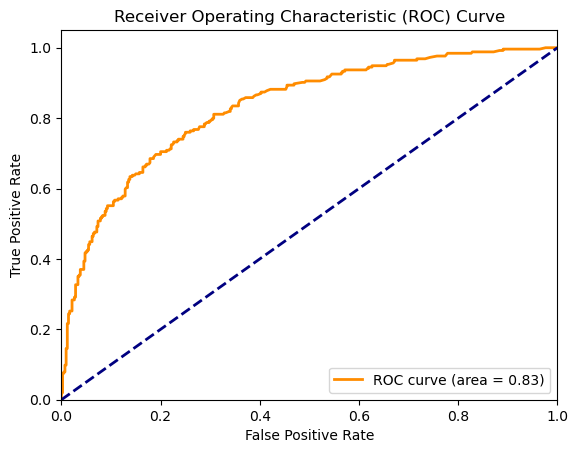

In [134]:
# Get the predicted probabilities for the positive class
y_prob = model.predict_proba(X_test[keep_list])[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [101]:
# Get model coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Calculate standard errors
X_train_const = np.column_stack([np.ones(X_train[keep_list].shape[0]), X_train[keep_list]])
predictions = model.predict_proba(X_train_const[:, 1:])[:, 1]
V = np.diagflat(predictions * (1 - predictions))
cov_logit = np.linalg.inv(np.dot(np.dot(X_train_const.T, V), X_train_const))
standard_errors = np.sqrt(np.diag(cov_logit))

# Calculate z-scores and p-values
z_scores = coefficients / standard_errors[1:]
p_values = [stats.norm.sf(abs(x)) * 2 for x in z_scores]


In [102]:
# Combine feature names, coefficients, and p-values into a DataFrame
summary_df = pd.DataFrame({
    'Feature': X_train[keep_list].columns,
    'Coefficient': coefficients,
    'Standard Error': standard_errors[1:],
    'z-score': z_scores,
    'p-value': p_values
})

print('Intercept:', intercept)
print('Summary:')
print(summary_df)

Intercept: -3.5099333690899095
Summary:
                             Feature  Coefficient  Standard Error    z-score  \
0                         race_Asian     0.740254        0.343014   2.158087   
1         adherent_flag_Non-Adherent     0.605389        0.217073   2.788877   
2       count_of_risks_p1_log_scaled    -0.531215        0.182621  -2.908834   
3                 total_concomitancy     0.180812        0.029192   6.193975   
4                   region_Northeast     0.882713        0.213119   4.141887   
5            ntm_speciality_ONCOLOGY     1.129542        0.213583   5.288546   
6                       region_South     0.813385        0.116823   6.962548   
7                  total_comorbidity     0.401816        0.026253  15.305350   
8  dexa_freq_during_rx_p1_log_scaled     3.224343        0.203281  15.861526   

        p-value  
0  3.092105e-02  
1  5.289122e-03  
2  3.627793e-03  
3  5.866541e-10  
4  3.444596e-05  
5  1.232925e-07  
6  3.341723e-12  
7  7.042239e-53

In [103]:
summary_df

,Feature,Coefficient,Standard Error,z-score,p-value
0,race_Asian,0.740254,0.343014,2.158087,3.092105e-02
1,adherent_flag_Non-Adherent,0.605389,0.217073,2.788877,5.289122e-03
2,count_of_risks_p1_log_scaled,-0.531215,0.182621,-2.908834,3.627793e-03
3,total_concomitancy,0.180812,0.029192,6.193975,5.866541e-10
4,region_Northeast,0.882713,0.213119,4.141887,3.444596e-05
5,ntm_speciality_ONCOLOGY,1.129542,0.213583,5.288546,1.232925e-07
6,region_South,0.813385,0.116823,6.962548,3.341723e-12
7,total_comorbidity,0.401816,0.026253,15.305350,7.042239e-53
8,dexa_freq_during_rx_p1_log_scaled,3.224343,0.203281,15.861526,1.170153e-56


### GBM model

#### Round 1

In [104]:
# Create the model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [105]:
# Make predictions
y_pred = gbm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.84       420
         1.0       0.76      0.62      0.68       254

    accuracy                           0.78       674
   macro avg       0.78      0.75      0.76       674
weighted avg       0.78      0.78      0.78       674

Confusion Matrix:
[[370  50]
 [ 96 158]]


In [106]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.2f}")

# Use the best estimator to make predictions
best_gbm = grid_search.best_estimator_
y_pred_best = best_gbm.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Accuracy: {accuracy_best:.2f}")

print("Best Classification Report:")
print(classification_report(y_test, y_pred_best))

print("Best Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}
Best Score: 0.82
Best Accuracy: 0.78
Best Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.89      0.83       420
         1.0       0.77      0.60      0.67       254

    accuracy                           0.78       674
   macro avg       0.78      0.74      0.75       674
weighted avg       0.78      0.78      0.77       674

Best Confusion Matrix:
[[374  46]
 [102 152]]


In [107]:
cm = confusion_matrix(y_test, y_pred)

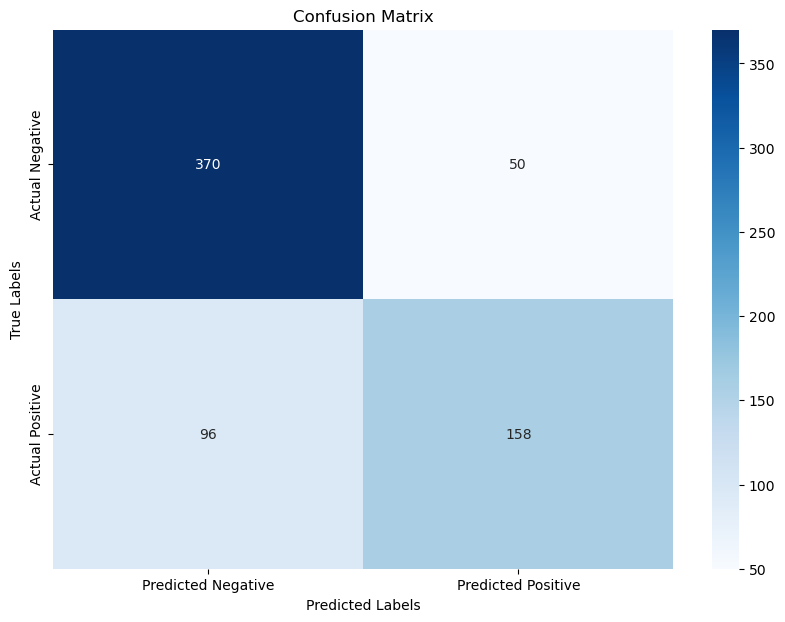

In [108]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [109]:
!pip install xgboost

In [110]:
# Clean feature names
df_final.columns = df_final.columns.astype(str)
df_final.columns = df_final.columns.str.replace('[', '', regex=True).str.replace(']', '', regex=True)
df_final.columns = df_final.columns.str.replace('<', '', regex=True).str.replace('>', '', regex=True)
df_final.columns = df_final.columns.str.replace(' ', '_')

In [111]:
# Split the data
X = df_final.drop('persistency_flag', axis=1)
y = df_final['persistency_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [112]:
# Define parameter grid
param_grid = {
    'eta': [0.01, 0.1, 0.2],
    'max_depth': [2, 6, 10]
}

In [113]:
# Initialize and train the model
model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', eta=0.1, max_depth=6, n_estimators=100)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [114]:
# Initialize XGBClassifier
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best parameters found:  {'eta': 0.1, 'max_depth': 2}


In [115]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'XGBoost Model Accuracy with XGBClassifier: {accuracy:.4f}')


XGBoost Model Accuracy with XGBClassifier: 0.7849


In [116]:
# Retrieve feature importances
importance = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                                               Feature  Importance
1                                  dexa_freq_during_rx    0.145056
46                                   total_comorbidity    0.053093
115                         adherent_flag_Non-Adherent    0.022240
12               comorb_long_term_current_drug_therapy    0.022201
22               concom_systemic_corticosteroids_plain    0.020731
..                                                 ...         ...
88                           ntm_speciality_PEDIATRICS    0.000000
89   ntm_speciality_PHYSICAL_MEDICINE_AND_REHABILIT...    0.000000
90                      ntm_speciality_PLASTIC_SURGERY    0.000000
66            ntm_speciality_CLINICAL_NURSE_SPECIALIST    0.000000
74                    ntm_speciality_HOSPITAL_MEDICINE    0.000000

[116 rows x 2 columns]


In [117]:
# Get top 50 features
top_50_features = importance_df.head(50)

print(top_50_features)

                                               Feature  Importance
1                                  dexa_freq_during_rx    0.145056
46                                   total_comorbidity    0.053093
115                         adherent_flag_Non-Adherent    0.022240
12               comorb_long_term_current_drug_therapy    0.022201
22               concom_systemic_corticosteroids_plain    0.020731
81                             ntm_speciality_ONCOLOGY    0.019827
29                               concom_viral_vaccines    0.019500
101                     ntm_specialist_flag_Specialist    0.018691
8    comorb_encntr_for_general_exam_w_o_complaint,_...    0.016625
7                    comorb_encounter_for_immunization    0.016336
24                             concom_fluoroquinolones    0.015374
9                          comorb_vitamin_d_deficiency    0.015287
61                                        region_South    0.014949
47                                  total_concomitancy    0.01

In [118]:
top_30_features = top_50_features.head(30)['Feature'].tolist()

In [119]:
X_train_top50 = X_train[top_50_features]
X_test_top50 = X_test[top_50_features]

X_train_top30 = X_train[top_30_features]
X_test_top30 = X_test[top_30_features]

In [120]:
# Function to evaluate model
def evaluate_model(model, X_test, y_test, label, plot_roc=True):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    if plot_roc:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='best')
        plt.show()


Evaluation with all features:
Accuracy: 0.7849
Precision: 0.7685
Recall: 0.6142
F1-score: 0.6827
ROC AUC: 0.8559
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       420
         1.0       0.77      0.61      0.68       254

    accuracy                           0.78       674
   macro avg       0.78      0.75      0.76       674
weighted avg       0.78      0.78      0.78       674



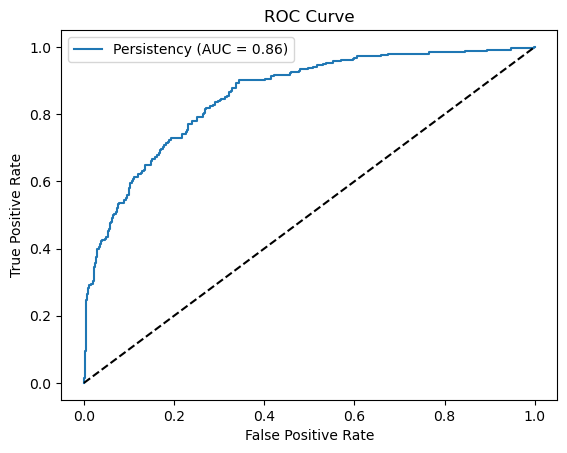

In [121]:
# Train and evaluate model with all features
print('Evaluation with all features:')
model_all = XGBClassifier(objective='binary:logistic', eval_metric='logloss', eta=0.1, max_depth=6, n_estimators=100)
model_all.fit(X_train, y_train)
evaluate_model(model_all, X_test, y_test,label='Persistency')





Evaluation with top 50 features:
Accuracy: 0.6231
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC AUC: 0.5000
Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.77       420
         1.0       0.00      0.00      0.00       254

    accuracy                           0.62       674
   macro avg       0.31      0.50      0.38       674
weighted avg       0.39      0.62      0.48       674



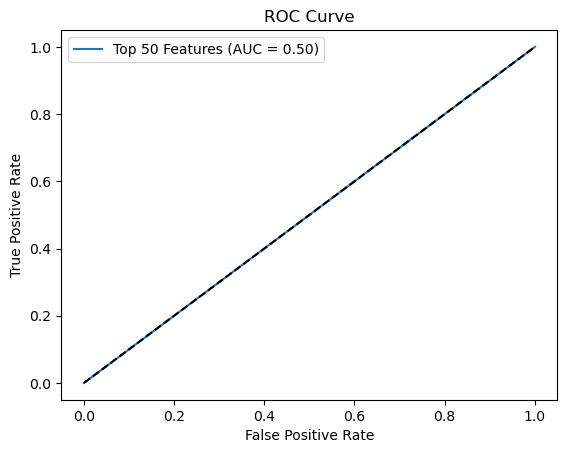

In [122]:
# Train and evaluate model with top 50 features
print('Evaluation with top 50 features:')
model_top50 = XGBClassifier(objective='binary:logistic', eval_metric='logloss', eta=0.1, max_depth=6, n_estimators=100)
model_top50.fit(X_train_top50, y_train)
evaluate_model(model_top50, X_test_top50, y_test,'Top 50 Features', plot_roc=True)


Evaluation with top 30 features:
Accuracy: 0.7671
Precision: 0.7413
Recall: 0.5866
F1-score: 0.6549
ROC AUC: 0.8462
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.88      0.82       420
         1.0       0.74      0.59      0.65       254

    accuracy                           0.77       674
   macro avg       0.76      0.73      0.74       674
weighted avg       0.76      0.77      0.76       674



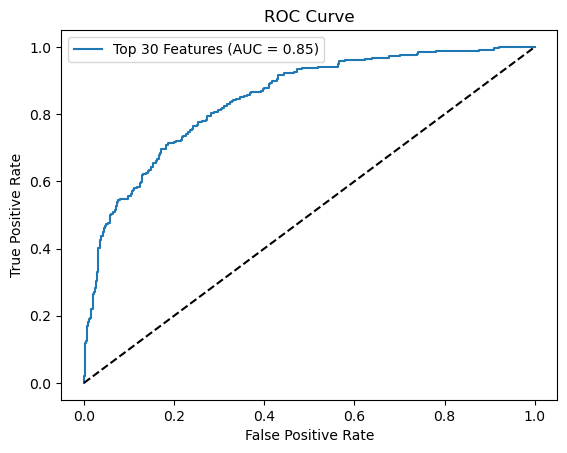

In [123]:
# Train and evaluate model with top 30 features
print('Evaluation with top 30 features:')
model_top30 = XGBClassifier(objective='binary:logistic', eval_metric='logloss', eta=0.1, max_depth=6, n_estimators=100)
model_top30.fit(X_train_top30, y_train)
evaluate_model(model_top30, X_test_top30, y_test,'Top 30 Features', plot_roc=True)

In [124]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_recall_fscore_support, roc_curve, auc
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [125]:
# Clean feature names
df_final.columns = df_final.columns.astype(str).str.replace('[', '', regex=True).str.replace(']', '', regex=True)
df_final.columns = df_final.columns.str.replace('<', '', regex=True).str.replace('>', '', regex=True)
df_final.columns = df_final.columns.str.replace(' ', '_').str.replace('(', '', regex=True).str.replace(')', '', regex=True)

# Split data
X = df_final.drop('persistency_flag', axis=1)
y = df_final['persistency_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming top_50_features is the DataFrame with top 50 feature importances
top_50_features_list = top_50_features['Feature'].tolist()
top_30_features_list = top_50_features.head(30)['Feature'].tolist()


Evaluation with all features:
All Features - Accuracy: 0.7849
All Features - Precision: 0.7685
All Features - Recall: 0.6142
All Features - F1-score: 0.6827
All Features - ROC AUC: 0.8559
All Features - Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       420
         1.0       0.77      0.61      0.68       254

    accuracy                           0.78       674
   macro avg       0.78      0.75      0.76       674
weighted avg       0.78      0.78      0.78       674

Evaluation with top 50 features:
Top 50 Features - Accuracy: 0.7834
Top 50 Features - Precision: 0.7647
Top 50 Features - Recall: 0.6142
Top 50 Features - F1-score: 0.6812
Top 50 Features - ROC AUC: 0.8581
Top 50 Features - Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       420
         1.0       0.76      0.61      0.68       254

    accuracy                        

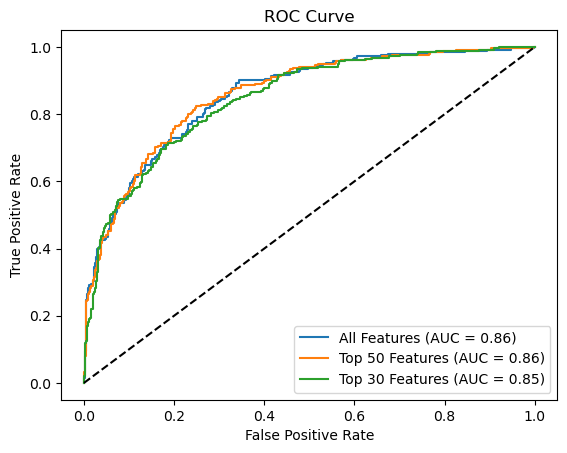

In [126]:
# Prepare datasets
X_train_all = X_train
X_test_all = X_test

X_train_top50 = X_train[top_50_features_list]
X_test_top50 = X_test[top_50_features_list]

X_train_top30 = X_train[top_30_features_list]
X_test_top30 = X_test[top_30_features_list]

# Function to evaluate model and optionally plot ROC curve
def evaluate_model(model, X_test, y_test, label, plot_roc=True):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f'{label} - Accuracy: {accuracy:.4f}')
    print(f'{label} - Precision: {precision:.4f}')
    print(f'{label} - Recall: {recall:.4f}')
    print(f'{label} - F1-score: {f1:.4f}')
    print(f'{label} - ROC AUC: {roc_auc:.4f}')
    print(f'{label} - Classification Report:')
    print(classification_report(y_test, y_pred))
    
    if plot_roc:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Train and evaluate model with all features
print('Evaluation with all features:')
model_all = XGBClassifier(objective='binary:logistic', eval_metric='logloss', learning_rate=0.1, max_depth=6, n_estimators=100)
model_all.fit(X_train_all, y_train)
evaluate_model(model_all, X_test_all, y_test, 'All Features', plot_roc=True)

# Train and evaluate model with top 50 features
print('Evaluation with top 50 features:')
model_top50 = XGBClassifier(objective='binary:logistic', eval_metric='logloss', learning_rate=0.1, max_depth=6, n_estimators=100)
model_top50.fit(X_train_top50, y_train)
evaluate_model(model_top50, X_test_top50, y_test, 'Top 50 Features', plot_roc=True)

# Train and evaluate model with top 30 features
print('Evaluation with top 30 features:')
model_top30 = XGBClassifier(objective='binary:logistic', eval_metric='logloss', learning_rate=0.1, max_depth=6, n_estimators=100)
model_top30.fit(X_train_top30, y_train)
evaluate_model(model_top30, X_test_top30, y_test, 'Top 30 Features', plot_roc=True)

# Plot ROC curves
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()